# Workshop 5: Statistics

**Submit this notebook to bCourses to receive a grade for this Workshop.**

Please complete workshop activities in code cells in this iPython notebook. The activities titled **Practice** are purely for you to explore Python. Some of them may have some code written, and you should try to modify it in different ways to understand how it works. Although no particular output is expected at submission time, it is _highly_ recommended that you read and work through the practice activities before or alongside the exercises. However, the activities titled **Exercise** have specific tasks and specific outputs expected. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook. The workshop should be submitted on bCourses under the Assignments tab.

## Preview: generating random numbers

We will discuss simulations in greater detail later in the semester. The first step in simulating nature -- which, despite Einstein's objections, is playing dice after all -- is to learn how to generate some numbers that appear random. Of course, computers cannot generate true random numbers -- they have to follow an algorithm. But the algorithm may be based on something that is difficult to predict (e.g. the time of day you are executing this code) and therefore *look* random to a human. Sequences of such numbers are called *pseudo-random*. 

The random variables you generate will be distributed according to some *Probability Density Function* (PDF). The most common PDF is *flat*: $f(x)=\frac{1}{b-a}$ for $x\in [a..b)$. Here is how to get a random number uniformly distributed between $a=0$ and $b=1$ in Python:

In [ ]:
# standard preamble
import numpy as np
import scipy as sp      
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# generate one random number between [0,1)
x = np.random.rand()
print ('x=', x)

# generate an array of 10 random numbers between [0,1)
array = np.random.rand(10)
print (array)

You can generate a set of randomly-distributed integer values instead:

In [ ]:
a = np.random.randint(0,1000,10)  
print(a)

# 1d distributions

## Moments of the distribution

Python's SciPy library contains a set of standard statistical functions. See a few examples below:

In [ ]:
# create a set of data and compute mean and variance
# This creates an array of 100 elements, uniformly-distributed between 100 and 200

# Try changing the size parameter!
x = np.random.uniform(low=100,high=200,size=100)

print(x[0:10])
# make a histogram
n, bins, patches = plt.hist(x, 20)

# various measures of "average value":
print('Mean = {0:5.0f}'.format(sp.mean(x)))
print( 'Median = {0:5.0f}'.format(sp.median(x)))

# measure of the spread
print('Standard deviation = {0:5.1f}'.format(np.std(x)))


### Exercise 1

We just introduced some new functions: `np.random.rand()`, `np.random.uniform()`, `plt.hist()`, `sp.mean()`, and `sp.median()`. So let's put them to work. You may also find `np.cos()`, `np.sin()`, and `np.std()` useful.

1. Generate 100 random numbers, uniformly distributed between [-$\pi,\pi$)
1. Plot them in a histogram.
1. Compute mean and standard deviation (RMS) 
1. Plot a histogram of sin(x) and cos(x), where x is a uniformly distributed random number between [-$\pi$,$\pi$). Do you understand this distribution ? 

## Gaussian/Normal distribution

You can also generate Gaussian-distributed numbers. Remember that a Gaussian (or Normal) distribution is a probability distribution given by 

$$P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\mu$ is the average of the distribution and $\sigma$ is the standard deviation. The **standard** normal distribution is a special case with $\mu = 0$ and $\sigma = 1$.

In [ ]:
# generate a single random number, gaussian-distributed with mean=0 and sigma=1. This is also called 
# a standard normal distribution
x = np.random.standard_normal()
print (x)

# generate an array of 10 such numbers
a = np.random.standard_normal(size=10)
print (a)

### Exercise 2
We now introduced `np.random.standard_normal()`.

1. Generate $N=100$ random numbers, Gaussian-distributed with $\mu=0$ and $\sigma=1$. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?
1. Now find the means, standard deviations, and errors on the means for each of the $M=1000$ experiments of $N=100$ measurements each. Plot a histogram of the means. Is it consistent with your calculation of the error on the mean for $N=100$ ? About how many experiments yield a result within $1\sigma$ of the true mean of 0 ? About how many are within $2\sigma$ ? Is this what you expected?
1. Now repeat question 4 for $N=10,50,1000,10000$. Plot a graph of the RMS of the distribution of the means vs $N$. Is it consistent with your expectations ? 

In [ ]:
# Your code for Exercise 2

## Exponential distribution

In this part we will repeat the above process, but now using lists of exponentially distributed random numbers. The probability of selecting a random number between $x$ and $x+dx$ is $\propto e^{-x}dx$. Exponential distributions often appear in lossy systems, e.g. if you plot an amplitude of a damped oscillator as a function of time. Or you may see it when you plot the number of decays of a radioactive isotope as a function of time. 

In [ ]:
# generate a single random number, exponentially-distributed with scale=1. 
x = np.random.exponential()
print (x)

# generate an array of 10 such numbers
a = np.random.exponential(size=10)
print (a)

### Exercise 3
We now introduced `np.random.exponential()`. This function can take up to two keywords, one of which is `size` as shown above. The other is `scale`. Use the documentation and experiment with this exercise to see what it does.

1. What do you expect to be the mean of the distribution? What do you expect to be the standard deviation?
1. Generate $N=100$ random numbers, exponentially-distributed with the keyword `scale` set to 1. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?
1. Now find the means, standard deviations, and errors on the means for each of the $M=1000$ experiments of $N=100$ measurements each. Plot a histogram of each quantity. Is the RMS of the distribution of the means consistent with your calculation of the error on the mean for $N=100$ ? 
1. Now repeat question 5 for $N=10,100,1000,10000$. Plot a graph of the RMS of the distribution of the means vs $N$. Is it consistent with your expectations ? This is a demonstration of the *Central Limit Theorem*


In [ ]:
# Your code for Exercise 3

## Binomial distribution
The binomial distribution with parameters $n$ and $p$ is the *discrete* probability distribution of the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability $p$. A typical example is a distribution of the number of *heads* for $n$ coin flips ($p=0.5$) 

In [ ]:
# Simulates flipping 1 fair coin  one time. Returns 0 for heads and 1 for tails
p = 0.5
print (np.random.binomial(1,p))

# Simulates flipping 5 biased coins three times
p = 0.7
print (np.random.binomial(5,p, size=3))

### Exercise 4
We now introduced the function `np.random.binomial(n,p)` which requires two arguments, `n` the number of coins being flipped in a single trial and `p` the probability that a particular coin lands tails. As usual, `size` is another optional keyword argument.
1. Generate an array of outcomes for flipping 1 unbiased coin 10 times.
1. Plot the outcomes in a histogram (0=heads, 1=tails). 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?


In [ ]:
# Your code for Exercise 4

## Poisson distribution
The Poisson distribution is a *discrete* probability distribution that expresses the probability of a given number of events $n$ occurring in a fixed interval of time $T$ if these events occur with a known average rate $\nu/T$ and independently of the time since the last event. The *expectation value* of $n$ is $\nu$. The variance of $n$ is also $\nu$, so the standard deviation of $n$ is $\sigma(n) = \sqrt{\nu}$

In [ ]:
nu = 10 # expected number of events
n = np.random.poisson(nu)  # generate a Poisson-distributed number.
print (n)

### Exercise 5
We introduced `np.random.poisson()`. As usual, you can use the keyword argument `size` to draw multiple samples.
1. Generate $N=100$ random numbers, Poisson-distributed with $\nu=10$. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?
1. Now repeat question 3 for $\nu=1,5,100,10000$. Plot a graph of the RMS vs $\nu$. Is it consistent with your expectations ? 


In [ ]:
# Your code for Exercise 5

## Fitting

Examples of how to do a fit to a graph were given in lecture. Let's practice with the fits a bit more. 

The simplest technique to describe is least-squares fitting (see lecture notes). Usually you use the least-squares fit if you have a set of data (pairs of data points $(x_i, y_i)$ ), and you want to describe it in terms of a model $y(x;\{\theta_j\})$, where parameters $\{\theta_j\}$ are unknown. The purpose of your fit is to determine the values of $\{\theta_j\}$ and (hopefully) their uncertainties. An example of a model is:

$$y = a_0 + a_1 x$$

where the unknown parameters $\theta_j$ are $a_0$ and $a_1$.

There are two standard cases where least-squares method is applicable:
1. You know errors for each data point $\sigma_i$ and you know that those errors are Gaussian. In this case, you minimize $\chi^2=\sum \left(\frac{y_i - y(x_i;\theta)}{\sigma_i}\right)^2$ with respect to the parameters $\{\theta_j\}$. The value of the $\chi^2_{\min}$ can be interpreted as a goodness-of-fit. The parameters $\{\theta_j\}$ that minimize $\chi^2$ have probabilistic interpretation
1. You know that the errors are Gaussian and are the same for each data point, but you do not know their magnitude. In this case, you would minimize the sum of squares: $\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. Then value of $\mathcal{S}$ can be used to *estimate* the errors $\sigma_i$ for each data point: $\sigma_i = \sqrt{\mathcal{S}/(N_\mathrm{data}-N_\mathrm{parameters})}$
The errors on $\theta$ have a probabilistic definition, but you lose information about the goodness of fit
1. If the errors are not known to be Gaussian, then the least square method is not useful to estimate uncertainties or the goodness of fit. It is also not guaranteed to be unbiased or most efficient. 

### Polynomial $\chi^2$ fit


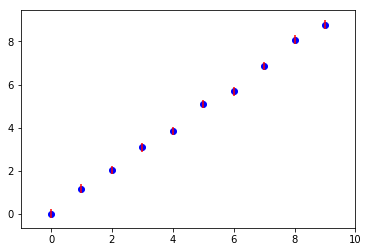

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
%matplotlib inline

# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
a0 = 0
b0 = 1
sig = 0.2
Npoints = 10

xdata = np.arange(0,Npoints,1.)
ydata = a0+xdata*b0+sig*np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)
plt.show()

a= 0.098+/-0.118
b= 0.971+/-0.022
chi^2 =  4.21
chi^2/d.f.= 0.53


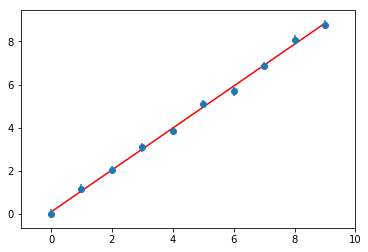

In [3]:
# Make sure you run the cell above this first to generate some artificial data
# to which we will fit this curve

# Define a fit model. For this part, we will use a linear function
# The function which defines your model HAS TO TAKE ON A SPECIFIC FORM
def model(x, a, b):
    return a + b*x

# You have to supply an initial guess of parameters, and they should be "close enough" to the true values, otherwise
# the fit may fall into a false minimum
par0    = np.array([0.5, -0.3]) # initial guess for parameters
par, cov = fitter.curve_fit(model, xdata, ydata, par0, sigma, absolute_sigma=True)

# par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
a = par[0]
ea = np.sqrt(cov[0,0])
print('a={0:6.3f}+/-{1:5.3f}'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print('b={0:6.3f}+/-{1:5.3f}'.format(b,eb))

# compute reduced chi2
chi_squared = np.sum(((model(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,Npoints)
xfit = np.linspace(0,Npoints-1.,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')
plt.show()

You can also do an *unweighted* fit if you do not know the uncertainties for each point. *curve_fit* will minimize 
$\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. You can use it to estimate the uncertainty for each point: 
$\sigma_i = \sqrt{\mathcal{S}/(N_\mathrm{data}-N_\mathrm{parameters})}$.

a= 0.098+/-0.085
b= 0.971+/-0.016
Generated error =  0.20
Computed error =  0.15


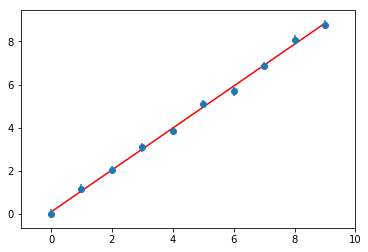

In [4]:
# You have to supply an initial guess of parameters, and they should be "close enough" to the true values, otherwise
# the fit may fall into a false minimum
par0    = np.array([0.5, -0.3]) # initial guess for parameters
par, cov = fitter.curve_fit(model, xdata, ydata, par0, sigma, absolute_sigma=False)

# par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
a = par[0]
ea = np.sqrt(cov[0,0])
print ('a={0:6.3f}+/-{1:5.3f}'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print ('b={0:6.3f}+/-{1:5.3f}'.format(b,eb))

# compute the error per point
sigCalc = np.sqrt(np.sum(((model(xdata, *par)-ydata))**2)/(len(xdata)-len(par)))
print ('Generated error = {0:5.2f}'.format(sig))
print ('Computed error = {0:5.2f}'.format(sigCalc))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,Npoints)
xfit = np.linspace(0,Npoints-1.,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')
plt.show()

### Exercise 6
We now introduced a new function: `scipy.optimize.curve_fit()`. The code in the cell immediately below will generate some data and store it an array of size `(500,3)` where the first column is $x$ values, the second column is the $y$ values, the third column is the uncertainty in each value. Use the techniques above to a quadratic model of the form
$$y = a_0 + a_1 x + a_2 x^2$$

Plot the data and your best fit curve with error and print out the values and their uncertainties as above.

In [ ]:
# Generate artificial data for Exercise 6 and plot it

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
%matplotlib inline

# Generate artificial data = quadratic function with a0 = 0, a1=1, a2 = -0.3
# plus some noise.
a0 = 0.5
a1 = 1
a2 = -0.3
sig = 0.4
Npoints = 10

xdata = np.arange(0,Npoints,1.)
ydata = a0 + a1 * xdata + a2 * xdata **2 + sig * np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)
plt.show()

In [ ]:
# Your code for Exercise 6

### Fitting to a distribution

`scipy.stats` package provides parameterizations of many standard probability density functions (PDFs). Each PDF has a *fit()* method, which does an *unbinned maximum likelihood fit* to a set of events, constraining the parameters of the PDF. Here is an example of a fit of a set of events to a Gaussian PDF.
Courtesy http://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# generate 1000 events from a normal distrubution
# with actual mean 0 and actual standard deviation 1
sample = norm.rvs(loc=0,scale=1,size=1000) 

# fit this sample to a gaussian distribution, determine parameters (stored in par)
par = norm.fit(sample) 

print ('mean={0:4.2f}'.format(par[0]))
print ('sigma={0:4.2f}'.format(par[1]))

# now, par[0] and par[1] are the mean and 
# the standard deviation of the fitted distribution

In [ ]:
# Plot the data and our fitted curve to visualize how well it fit

x = np.linspace(-5,5,100)

# original distribution that we generated data from
pdf = norm.pdf(x)

# fitted distribution
pdf_fitted = norm.pdf(x,loc=par[0],scale=par[1])

plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-',x,pdf,'b-')
plt.hist(sample,density=True, alpha=.3)
plt.show()

Unfortunately, *scipy.stats.fit* does not provide an esitimate of the covariance matrix (or even the errors on the parameters). This is a major problem with doing max-likelihood fits using *scipy.stats* package ! (any respectable physicist needs to report errors for his/her measurements !). There are more advanced tools for likelihood fitting that do provide error estimates -- but at this point they are beyond the scope of this class. But here are a few pointers:

- PyROOT: https://root.cern.ch/pyroot
- KaFE: http://www-ekp.physik.uni-karlsruhe.de/~quast/kafe/html/

For a Gaussian distribution, and a few others, max-likelihood estimators have analytic formulae:

$\hat{\mu} = \frac{1}{N}\sum_{i=1}^N x_i$

$\hat{\sigma^2} = \frac{1}{N}\sum_{i=1}^N (x_i-\hat{\mu})^2$

In [ ]:
# generate 1000 events from a normal distrubution
# with actual mean 0 and actual standard deviation 1
sample = norm.rvs(loc=0,scale=1,size=1000) 

N=len(sample)
mean = np.mean(sample)
sigma = np.sqrt(np.sum((sample-mean)**2)/N)
eMean = sigma/np.sqrt(N)
eSigma=np.sqrt((np.sum((sample-mean)**4)/N-(N-3)/(N-1)*sigma**4)/N)
print ('Max-likelihood estimate of mean={0:4.2f}+/-{1:4.2f}'.format(mean,eMean))
print ('Max-likelihood estimate of sigma={0:4.2f}+/-{1:4.2f}'.format(sigma,eSigma))


A more common way to determine parameters of a distribution is to do perform a *binned least-squares fit*, i.e. fit a distribution to a histogram. When doing so, it is important to assign proper Poisson errors to each bin of a histogram. Here is how you can create a histogram with Poisson errors:

In [ ]:
# Generate data for Exercise 7
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# generate 1000 events from a normal distrubution
# with actual mean 0 and actual standard deviation 1
sample = norm.rvs(loc=0,scale=1,size=1000) 

y, bin_edges = np.histogram(sample, range=(-4,4),bins=40)
x = 0.5*(bin_edges[1:] + bin_edges[:-1])
ey = np.sqrt(y)
# have to be careful to make sure errors are never zero, or chi2 fit would fail ! Assign minimum error of 1 to all bins
ey = [max(error,1) for error in ey]

plt.errorbar(x,y,ey, fmt='o')
plt.show()


### Optional: Exercise 7

Fit the data above, stored in the arrays `x`, `y`, and `ey` (the estimated uncertainties), to a Gaussian function using a $\chi^2$ fit, print mean and sigma parameters and their uncertainties. Plot your function overlayed with the data as plotted above. *Hint*: use *scipy.optimize.curve_fit* example above. A Gaussian function has the form
$$ y(x) = Ae^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
How many parameters should your model function have? Remember that your final Gaussian function should be normalized (that is, it is a probability distribution, so the area under it should be equal to 1. How can you ensure that? *Hint*: The normal distribution defined above is normalized) For plotting, you may find the `norm.pdf()` function from `scipy.stats` (described above) useful.

In [ ]:
# Your code for Exercise 7